# **Preprocessing**

**Import libraries**

In [18]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Create dataframe**

In [19]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

**Check dataframe**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [21]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [22]:
for i in df.columns:
  print(i, df[i].unique())

Diabetes_binary [0. 1.]
HighBP [1. 0.]
HighChol [1. 0.]
CholCheck [1. 0.]
BMI [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker [1. 0.]
Stroke [0. 1.]
HeartDiseaseorAttack [0. 1.]
PhysActivity [0. 1.]
Fruits [0. 1.]
Veggies [1. 0.]
HvyAlcoholConsump [0. 1.]
AnyHealthcare [1. 0.]
NoDocbcCost [0. 1.]
GenHlth [5. 3. 2. 4. 1.]
MentHlth [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk [1. 0.]
Sex [0. 1.]
Age [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education [4. 6. 

In [23]:
df.shape

(253680, 22)

**Balance data**

In [24]:
x = df.loc[:, 'HighBP':]
y = df.loc[:, 'Diabetes_binary']
undersample = RandomUnderSampler(sampling_strategy='majority')
x1, y1 = undersample.fit_resample(x, y)
balanced_df = pd.DataFrame.from_records(data=pd.concat((y1, x1), axis=1))
balanced_df.columns = df.columns
balanced_df.shape

(70692, 22)

**Feature Selection**

In [25]:
cor = balanced_df.corr()
cor_target = abs(cor["Diabetes_binary"])
relevant_features = cor_target[cor_target >= 0.25]
df = balanced_df[relevant_features.index]
df.shape

(70692, 7)

**Normalization**

In [26]:
sc = StandardScaler()
scaled_data = pd.DataFrame(sc.fit_transform(df))
scaled_data.columns = df.columns
df = scaled_data
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,GenHlth,DiffWalk,Age
0,-1.0,-1.140689,-1.057408,-0.686448,-0.754710,-0.583035,-0.914485
1,-1.0,-1.140689,-1.057408,1.430413,0.143653,1.715164,-0.914485
2,-1.0,-1.140689,-1.057408,0.301421,-1.653073,-0.583035,-0.914485
3,-1.0,-1.140689,-1.057408,-0.968696,1.042016,-0.583035,-0.213080
4,-1.0,0.876663,0.945708,0.442545,-0.754710,-0.583035,0.137623


**Split data**

In [27]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# **Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid,
                           n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

model_LogisticRegression = LogisticRegression(C=grid_result.best_params_['C'], penalty=grid_result.best_params_['penalty'], solver=grid_result.best_params_['solver'])
model_LogisticRegression.fit(X_train, y_train)

Best: 0.739597 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


LogisticRegression(C=0.1, solver='newton-cg')

**Save model**

In [41]:
pickle.dump(model_LogisticRegression, open('Logistic_Regression.sav', 'wb'))

**ROC Curve**

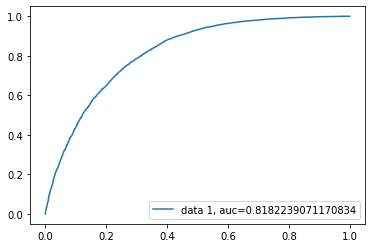

In [42]:
import sklearn as sk
y_pred_proba = model_LogisticRegression.predict_proba(X_test)[::, 1]
fpr, tpr, _ = sk.metrics.roc_curve(y_test,  y_pred_proba)
auc = sk.metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend()
plt.show()

# **Decision Tree Classifier**

In [34]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

# define grid search
grid = dict(criterion=criterion, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
id3 = DecisionTreeClassifier(criterion=grid_result.best_params_['criterion'], max_depth=grid_result.best_params_['max_depth'])
id3.fit(X_train, y_train)
print(id3.score(X_test, y_test))

# save the model to disk
pickle.dump(id3, open('DecisionTree.sav', 'wb'))

Best: 0.738301 using {'criterion': 'gini', 'max_depth': 8}
0.7415832060204832


# **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
KNN = KNeighborsClassifier(n_neighbors=grid_result.best_params_['n_neighbors'], weights=grid_result.best_params_['weights'], metric=grid_result.best_params_['metric'])
KNN.fit(X_train, y_train)
print(KNN.score(X_test, y_test))

# save the model to disk
pickle.dump(KNN, open('KNN.sav', 'wb'))

Best: 0.731543 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.7329259322129803


# **Hard Voting Classisier**

In [46]:
from sklearn.ensemble import VotingClassifier

voting_classifier_hard = VotingClassifier(
    estimators = [('dtc',id3),
                  ('lr', model_LogisticRegression),
                  ('KNN', KNN)],
    voting='hard')

voting_classifier_hard.fit(X_train, y_train)
print(voting_classifier_hard.score(X_test, y_test))

# save the model to disk
pickle.dump(voting_classifier_hard, open('HardVoting.sav', 'wb'))

0.7420358739319867
